In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = 120 (DT를 120개 만듦)

model = RandomForestClassifier(n_estimators=1, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

### Model Accuracy Evaluation

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

pred = model.predict(X_test)
score = accuracy_score(pred, y_test)
print(score)

0.9736842105263158


In [5]:
# Sample Data
y_true = [2,0,2,2,0,1] # 실제 target
y_pred = [0,0,2,2,0,2] # 예측한 값
confusion_matrix(y_true, y_pred) # 2차원으로 메트릭스 구조이다. 

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

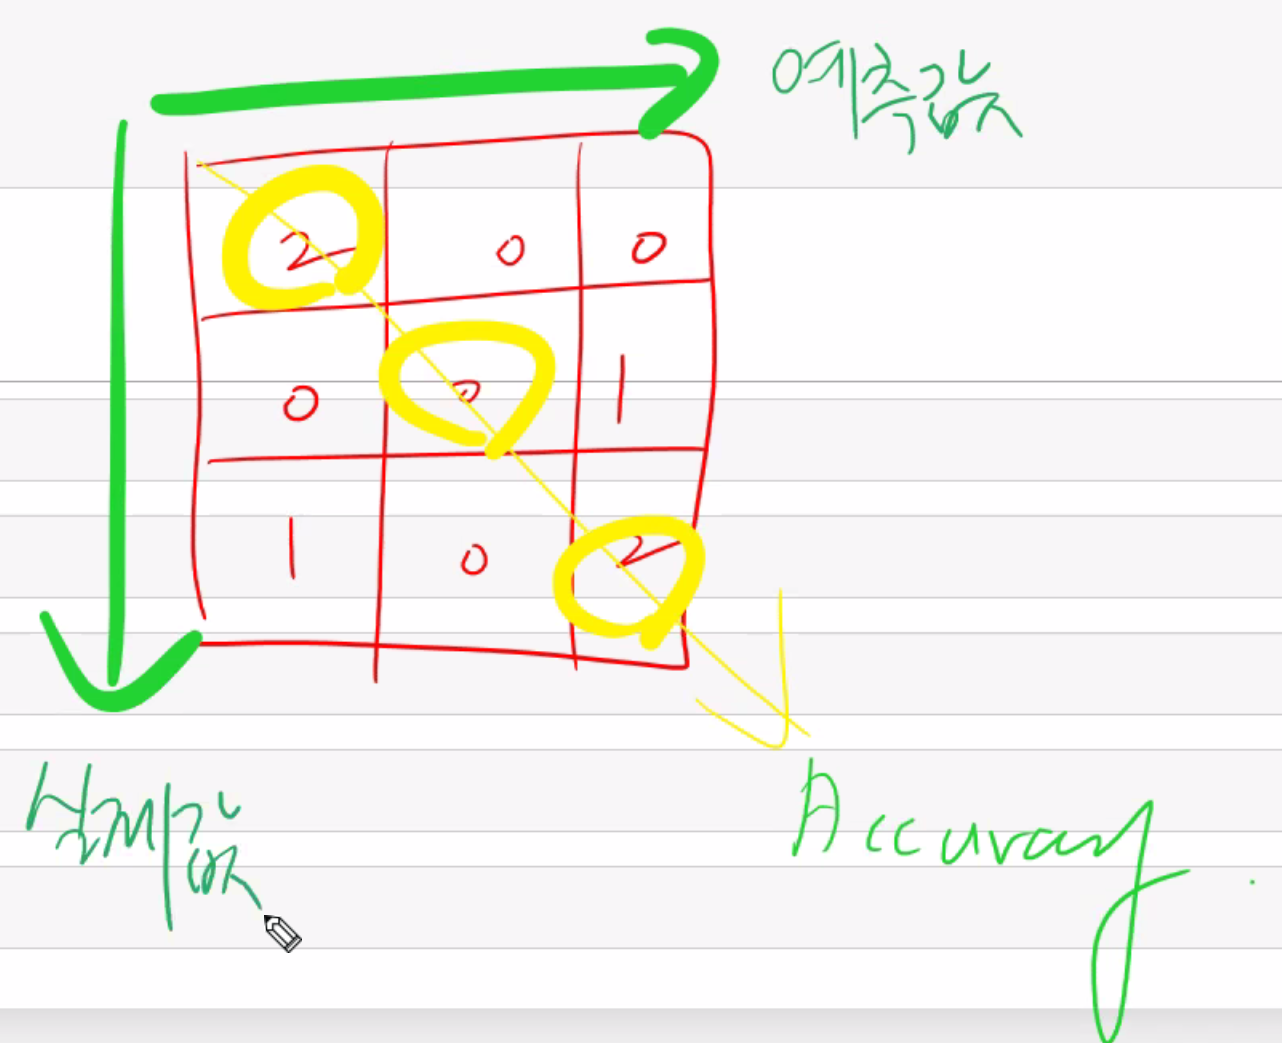

In [6]:
# Sample Data
y_true = [2,1,2,2,0,1] # 실제 target
y_pred = [2,0,1,2,0,1] # 예측한 값
confusion_matrix(y_true=y_true, y_pred=y_pred) # 2차원으로 메트릭스 구조이다. 

array([[1, 0, 0],
       [1, 1, 0],
       [0, 1, 2]], dtype=int64)

In [7]:
a = ['cherry','apple','apple','banana','cherry']
b = ['cherry','cherry','apple','banana','apple']
confusion_matrix(a,b)

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=int64)

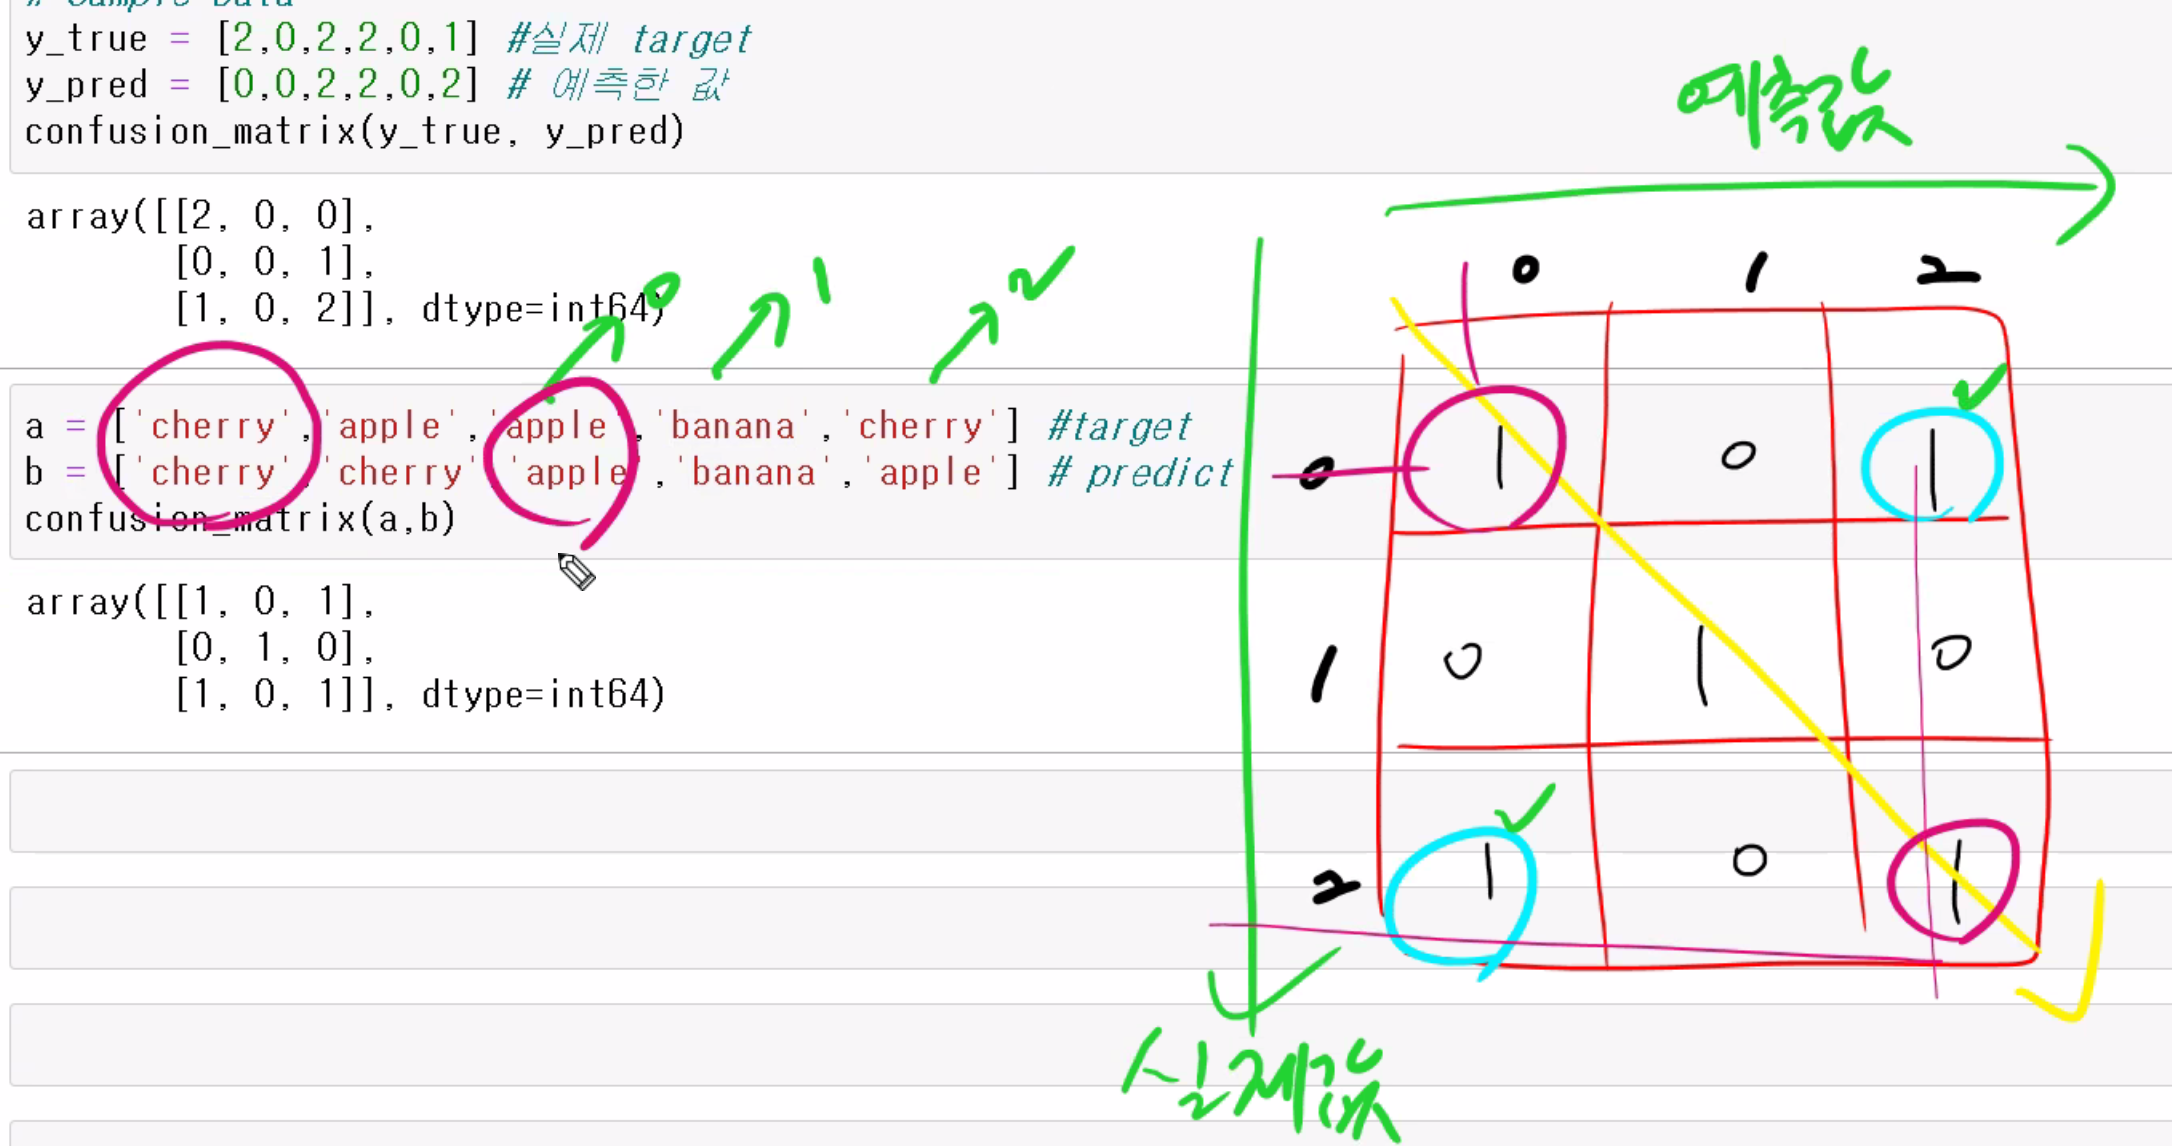

In [8]:
a = ['cherry','apple','apple','banana','cherry']
b = ['cherry','cherry','apple','banana','apple']
confusion_matrix(a,b, labels=['cherry','apple','banana'])#0,1,2

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

체리를 애플로 예측한것과, 사과를 체리로 예측했다.

### Confusion Matrix를 실제 데이터에 적용, 시각화

In [11]:
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=iris.target_names, index=iris.target_names)
cm

setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          10          1
virginica        0           0         12

<AxesSubplot:>

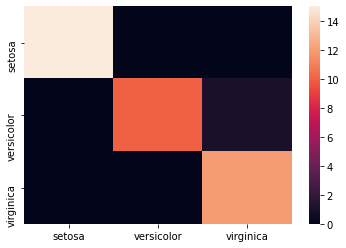

In [14]:
import seaborn as sns
sns.heatmap(cm)

<AxesSubplot:>

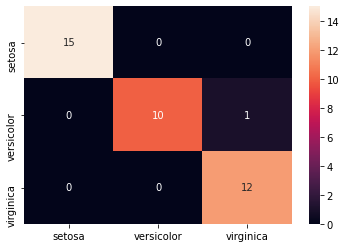

In [15]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot:>

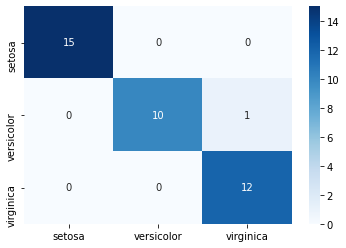

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

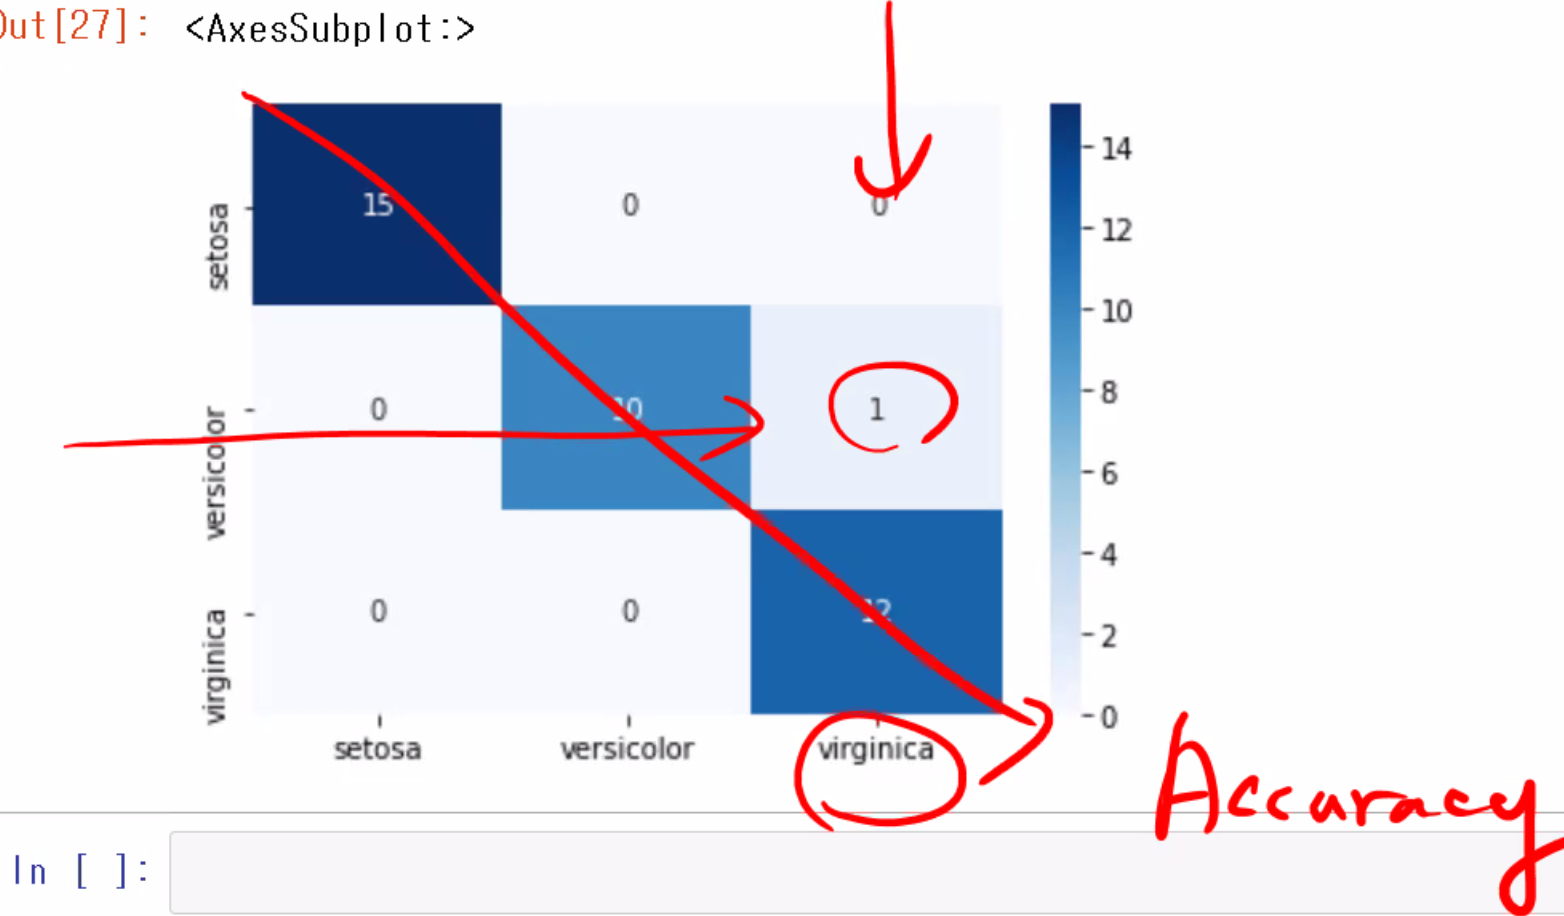

versicolor를 virginica로 잘못 예측했다.

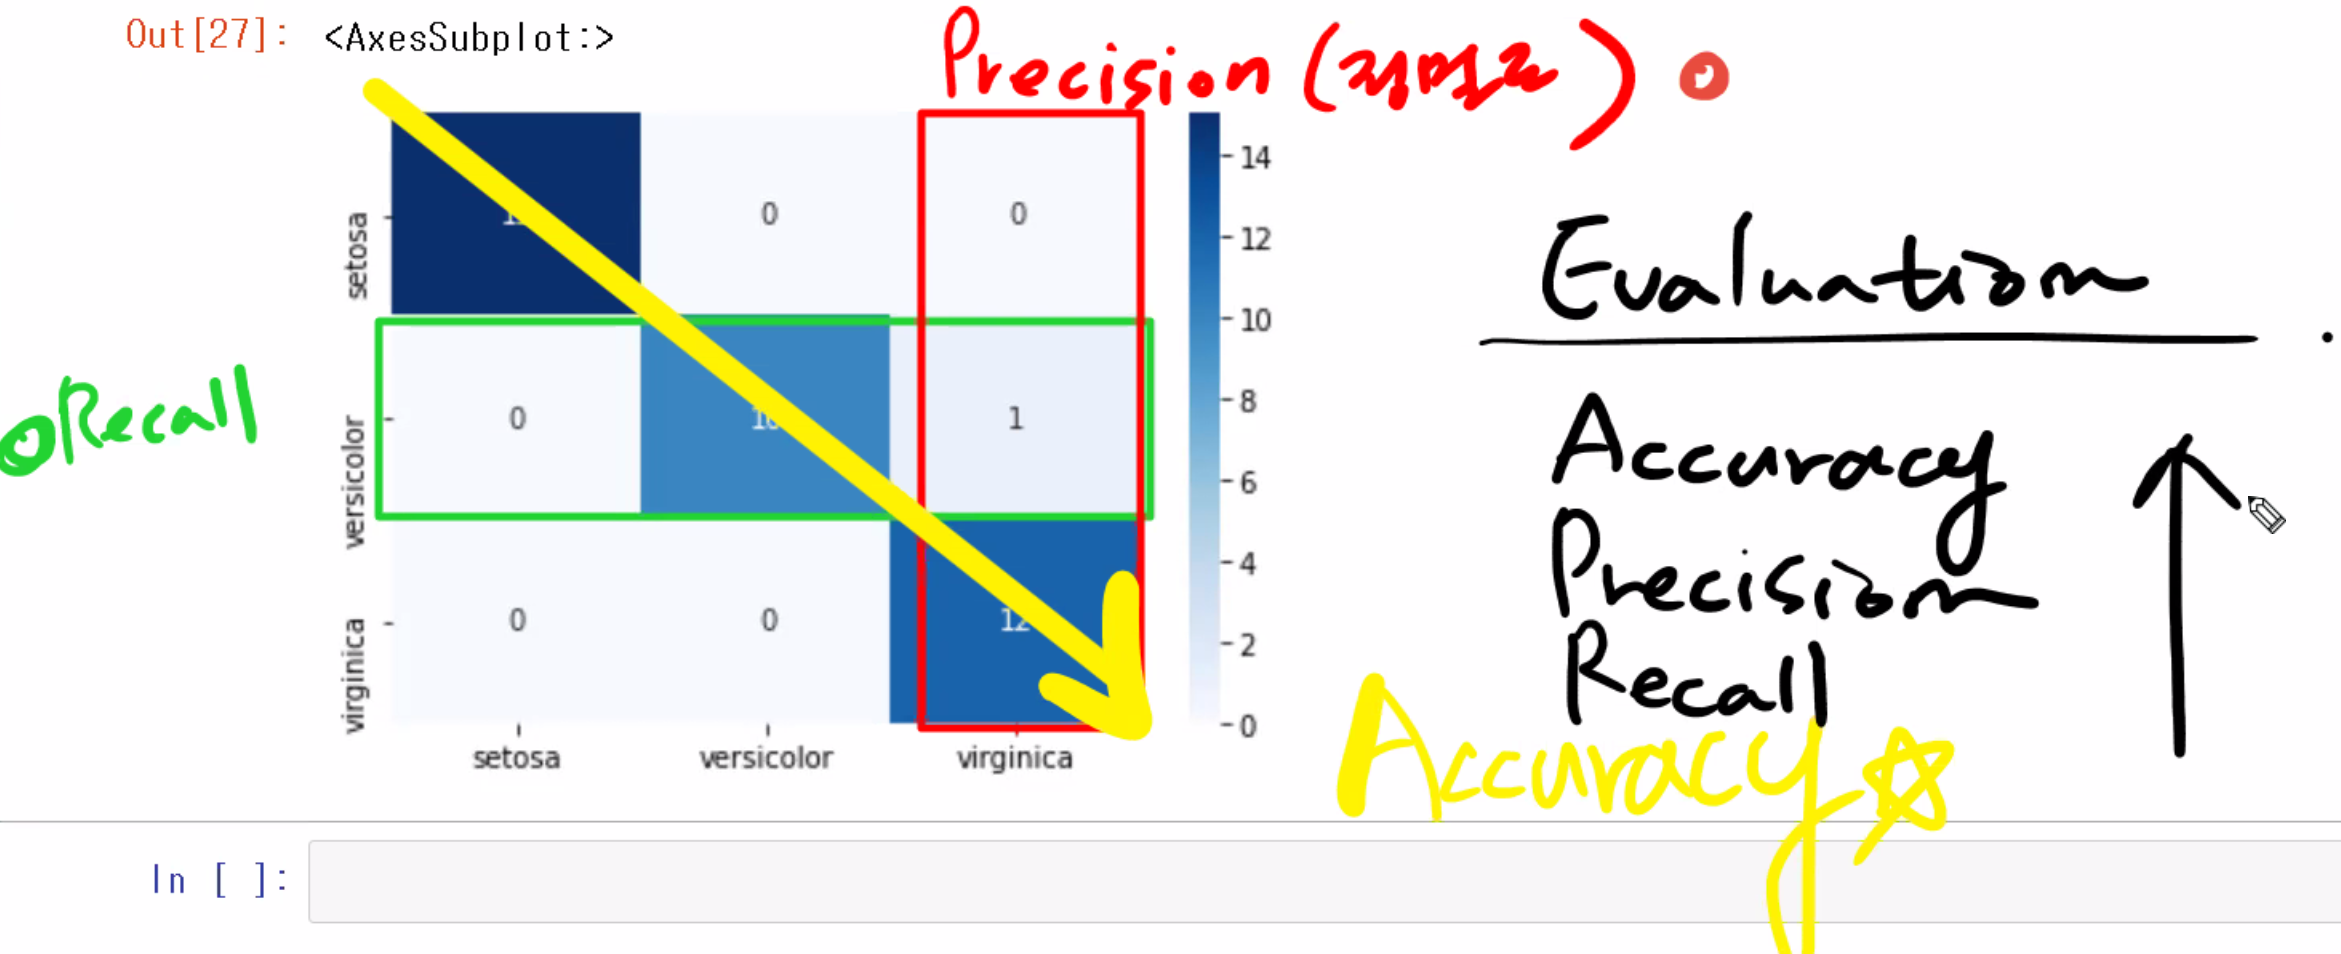

성능 평가에서는 Accu, precision, recall이 높게 나와야 잘 나온것이라고 할 수 있다.

실제로 맑은날씨를 모델이 맑다고 제대로 예측한 부분은 어디에 해당할까?
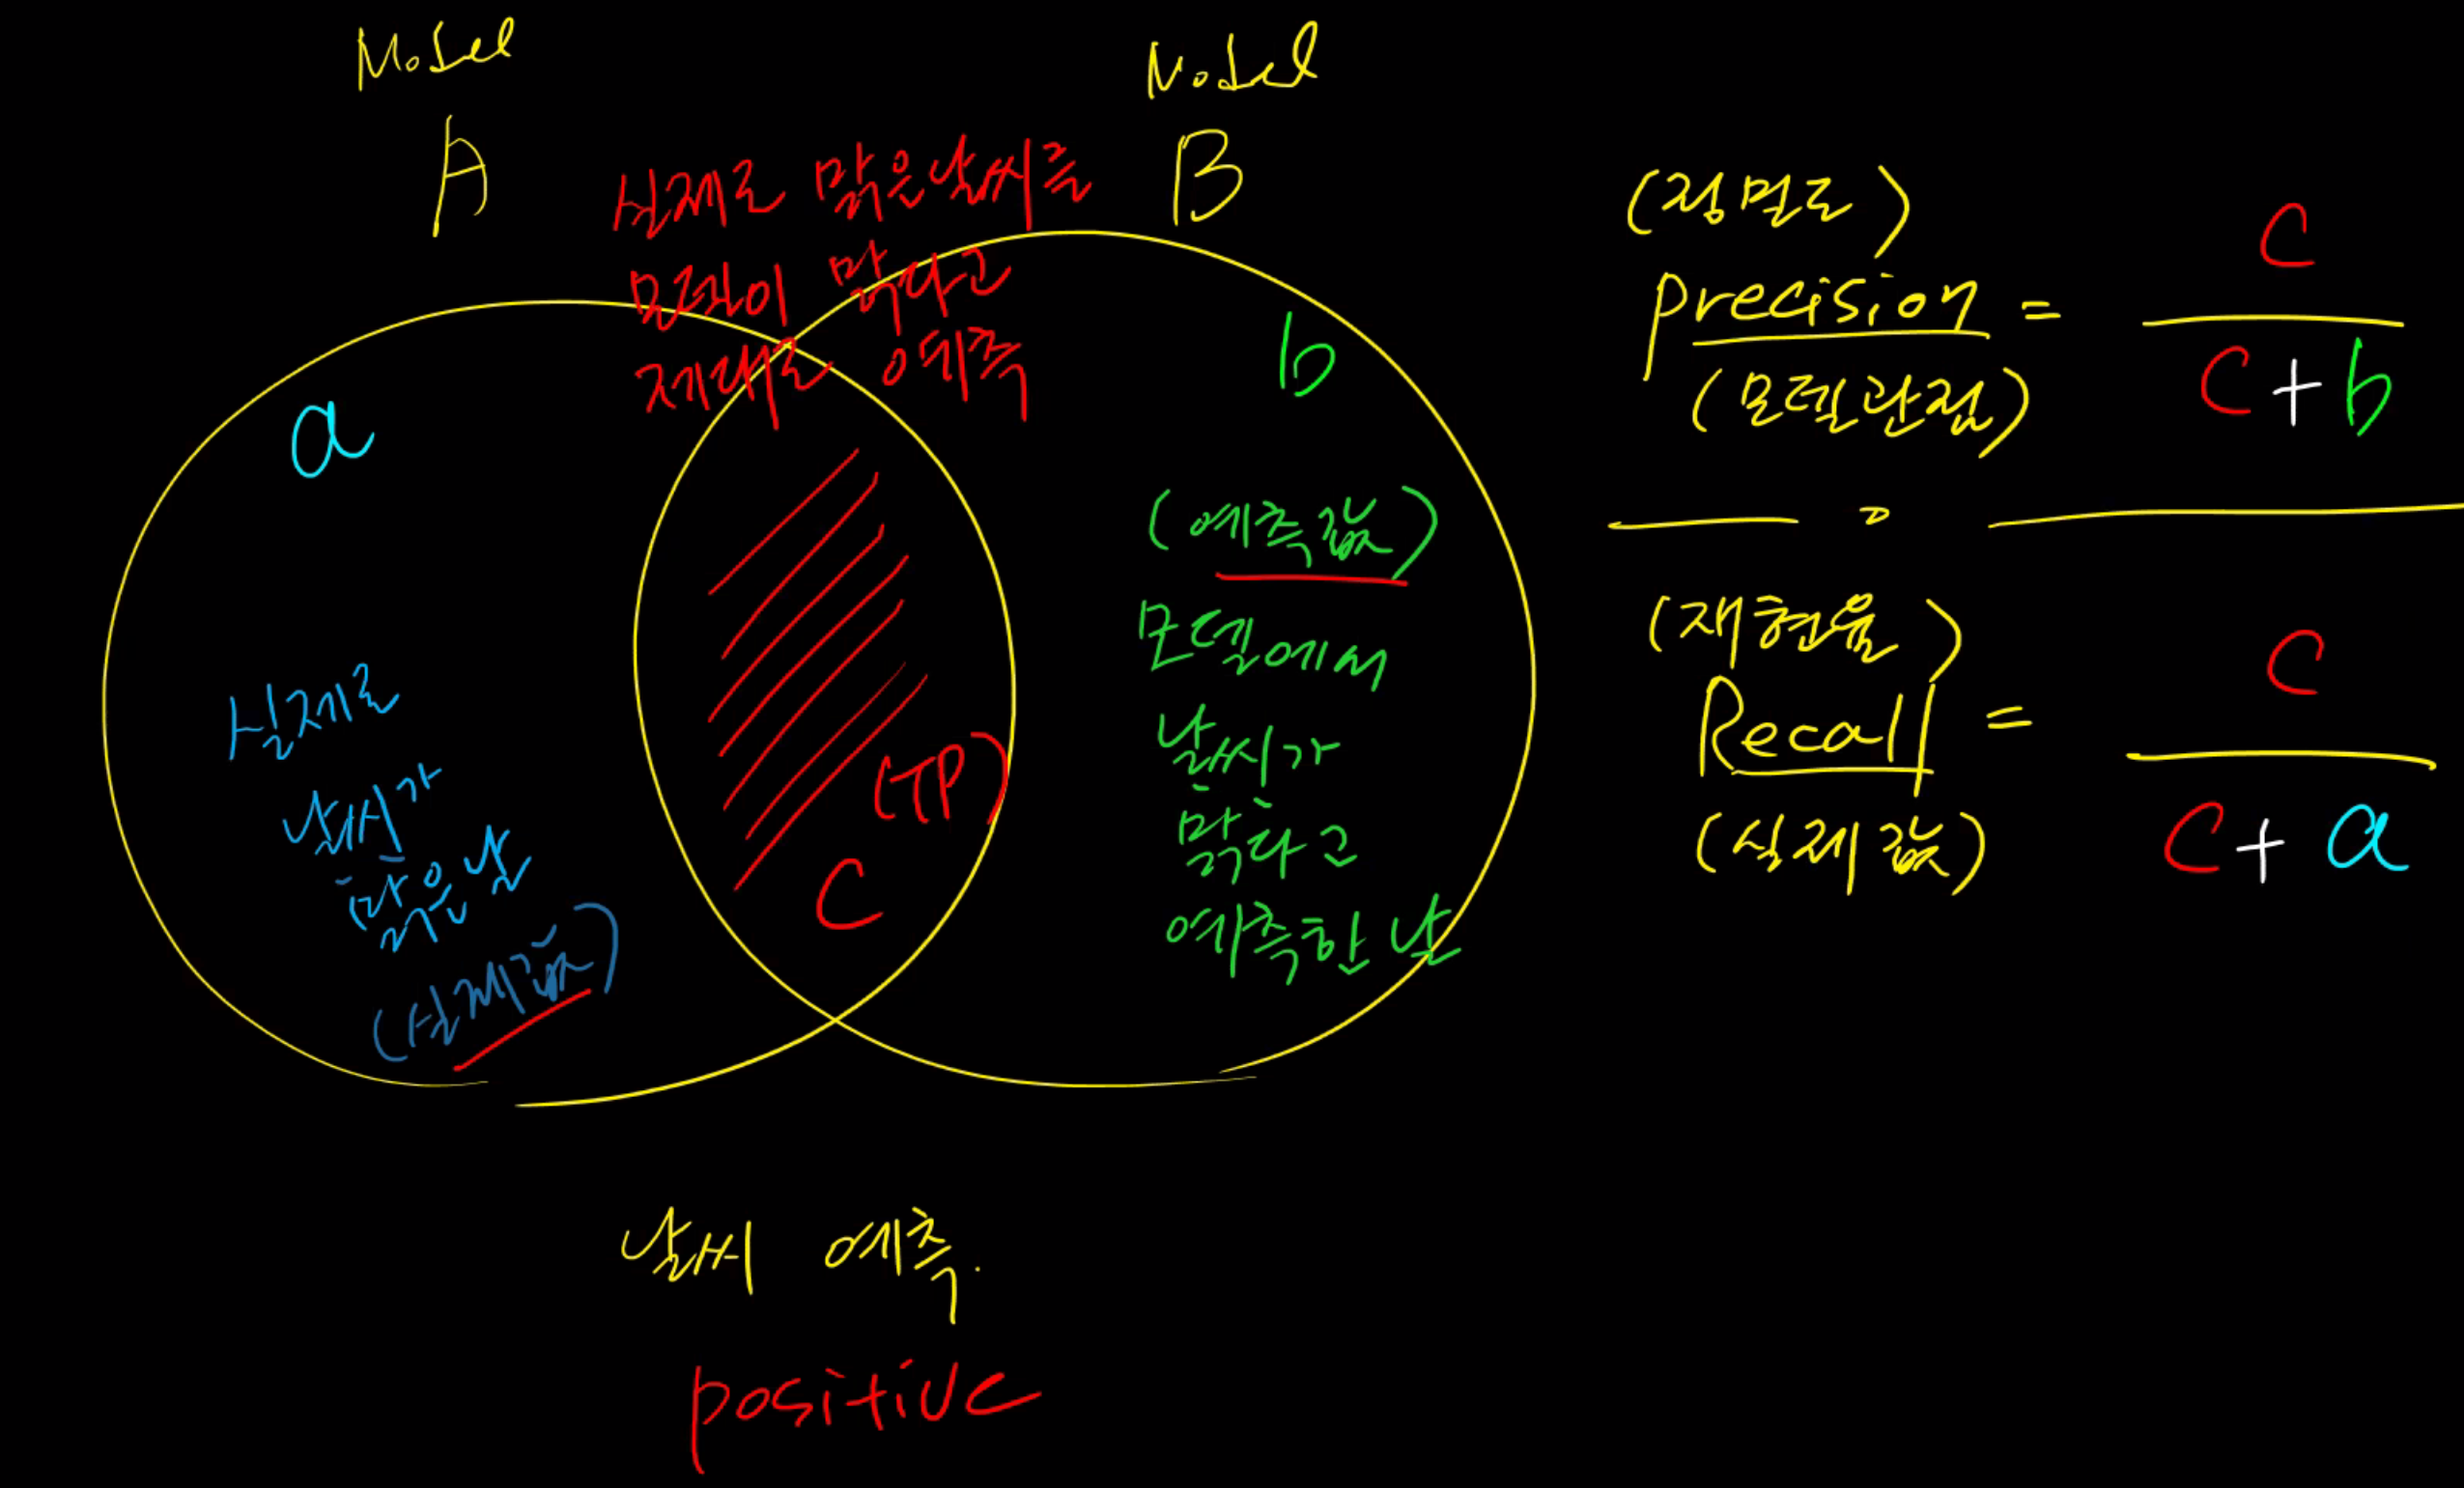

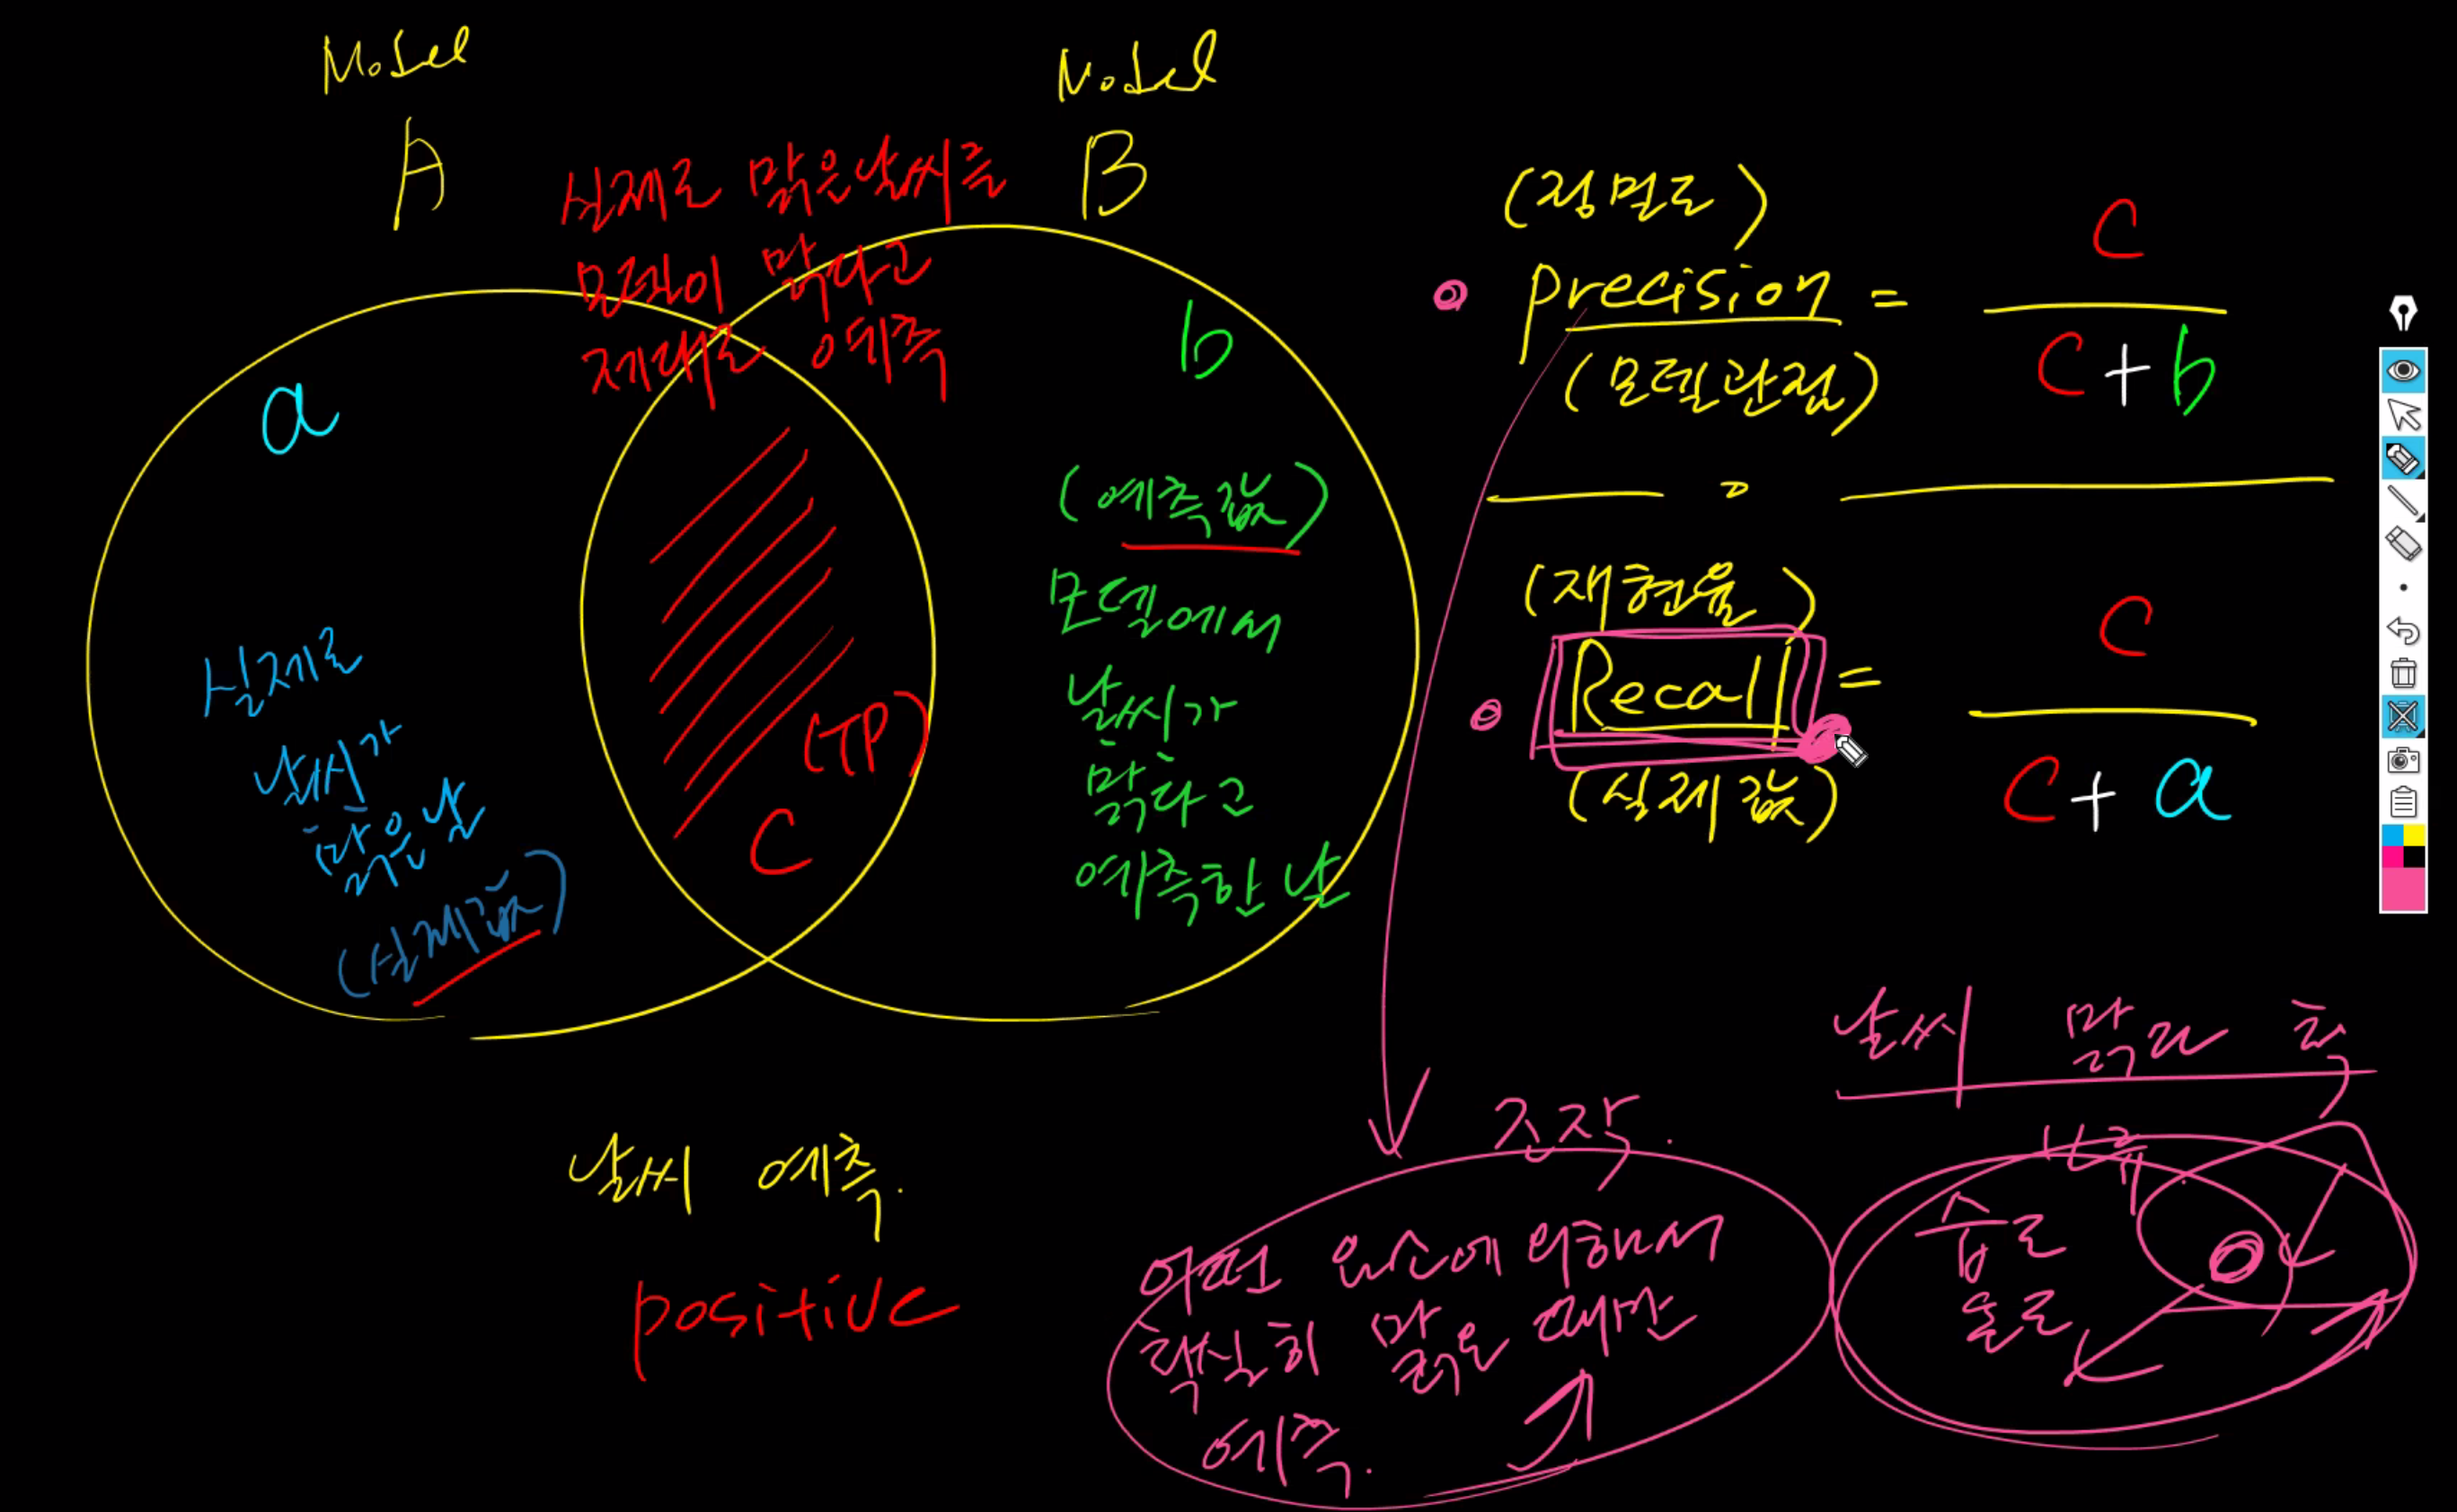
Precision은 조작이 가능해서, Recall을 좀더 비중있게 다룬다.  
결론은 서로 상호 보완적이다.